# Herrera Monteza Jherson Miguel

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style            # Libreria para estilos de graficos
plt.style.use(['science', 'notebook']) 

1.- Resuleva por el método de Runge Kutta de 4to orden la ecuación:
$$ y^{\prime} = \dfrac{2}{t}y + t^2 e^{t} \hspace{1cm} 1 \leq t \leq 2  \hspace{1cm} y(1)=0$$

In [52]:
# Definimos el algorítmo de runge kutta
def runge_kutta(funcion, h, yo, y = None):
    if y is None:
        y = [yo]
    tiempo = np.arange(1,2+h,h)
    for i in range(len(tiempo)-1):
        k1 = h*funcion(y[i],tiempo[i])
        k2 = h*funcion(y[i]+0.5*k1,tiempo[i]+0.5*h)
        k3 = h*funcion(y[i]+0.5*k2,tiempo[i]+0.5*h)
        k4 = h*funcion(y[i]+k3,tiempo[i]+h)
        y.append(y[i]+(k1+2*k2+2*k3+k4)/6)
    return y, tiempo

In [53]:
#La función de la ecuación
def fun2(y,t):
    return (2/t)*y+(t**2)*np.exp(t)

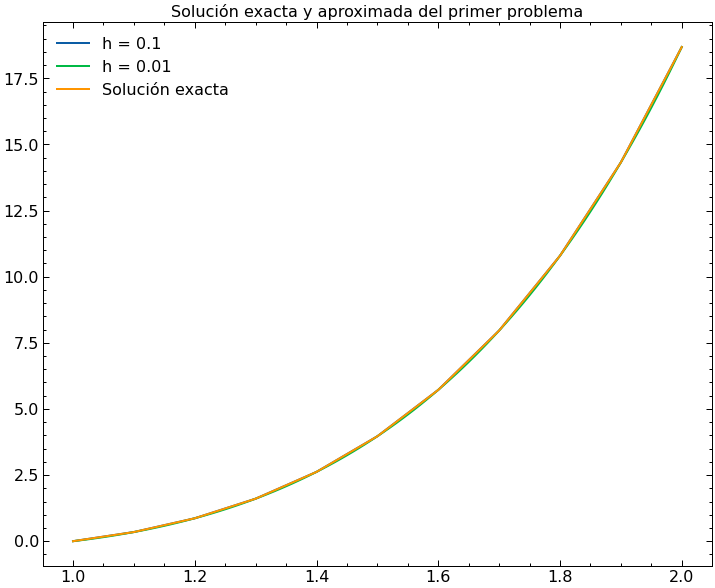

In [54]:
# Llamamos la función de runge kutta y graficamos los resultados
axj = plt.figure(figsize=(12,10))
y, t = runge_kutta(fun2, 0.1, yo = 0)
plt.plot(t,y, label = 'h = 0.1')
y1, t1 = runge_kutta(fun2, 0.01, yo = 0)
plt.plot(t1,y1, label = 'h = 0.01')
#Solución exacta
y = t**2*(np.exp(t)-np.e)
plt.plot(t,y, label = 'Solución exacta')
plt.title('Solución exacta y aproximada del primer problema')
plt.legend()

2.- Resuelva Numéricamente el siguiente problema de valor de frontera, cuya solución exacta
analítica esta dada por la siguiente función: 

$$ x^2 u^{\prime \prime} +xu^{\prime}+u=\dfrac{1}{x}; \hspace{1cm} u(1)=1;\hspace{1cm} u(2)=0$$

para $h = \frac{b-a}{N}$ con $N=6$ y $N=30$

Despejamos $u^{\prime \prime}$:
$$ u^{\prime \prime}+ \dfrac{1}{x}u^{\prime} +\dfrac{1}{x^2} = \dfrac{1}{x^3}$$
$$ \dfrac{1}{4 h^2}[u_{i+1,j} + u_{i,j+1} + u_{i-1,j} + u_{i,j-1}] +\dfrac{1}{x2h}[u_{i+1}-u_{i-1}]= \dfrac{1}{x^3}-\dfrac{1}{x^2} $$

In [59]:
# Para N=6
N = 30
x1 = 1
x2 = 2
u1 = 1
u2 = 0
h = (x2-x1)/(N+1)

In [74]:
x = np.linspace(x1,x2,N+2)
b = np.zeros(N+2)
A = np.eye(N+2)*(1/(x*2*h))

In [76]:
for k in range (0,N-1):
    b[k] = u1*(x[k+1]-x[k])
    A[k,k] = -1/(x[k+1]-x[k])
    A[k,k+1] = 1/(x[k+1]-x[k])
    A[k+1,k] = 1/(x[k+1]-x[k])
    
b[0] = u1*(x[1]-x[0])
b[N-1] = u2*(x[N]-x[N-1])